In [2]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

### **LIF model**

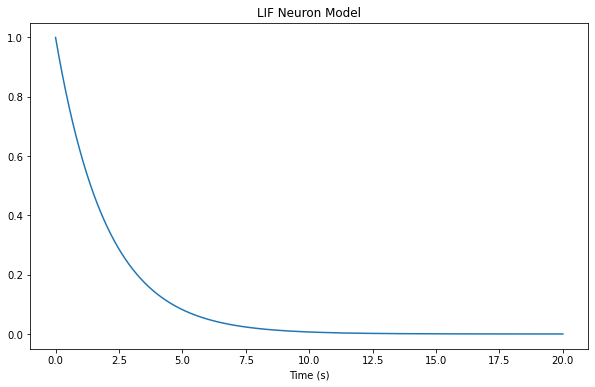

In [3]:
# Use Euler method for solving a sample LIF neuron model
# LIF model differential equation: dV/dt = -(V - V_init)/tau


t = 0. # Starting time
dt = 0.001 # Time step
tEnd = 20. # End time

# LIF parameters
V_init = 0 # neuron starting voltage (at t = 0)
Vt = 1 # Neuron voltage at time step t
tau = 2. # Time constant

lstV = [] # List to store voltage values
lstTime = [] # List to store time values

for i in range(int(tEnd/dt)):
    # Use Euler method
    Vt = Vt + dt * (-(Vt - V_init)/tau)
    
    t += dt
    
    lstV.append(Vt)
    lstTime.append(t)

# plot the results
fig = plt.figure(figsize=(10, 6))
plt.plot(lstTime, lstV)
plt.title('LIF Neuron Model')
plt.xlabel('Time (s)')
plt.show()

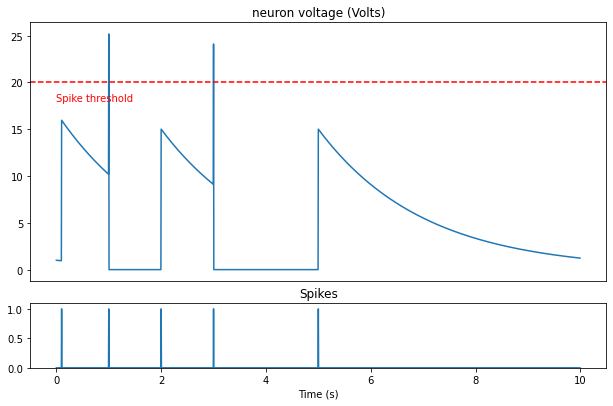

In [15]:
# Use Euler method for exciting a neuron multiple times

t = Decimal("0") # Starting time
dt = Decimal("0.005") # Time step
tEnd = Decimal("10") # End time

# LIF parameters
V_th = 20 # Volts
V_init = 0 # neuron starting voltage (at t = 0)
Vt = 1 # Neuron voltage at time step t
tau = 2. # Time constant
V_excitation = 15 # Voltage added to the neuron at each time step
tExcitation = [Decimal(".1"), Decimal("1"), Decimal("2"), Decimal("3"), Decimal("5")]

lstV = [] # List to store voltage values
lstTime = [] # List to store time values
lstSpike = [] # List to store spike values at each time step

for i in range(int(tEnd/dt)):
    # Use Euler method
    
    # If voltage is greater than threshold, reset voltage
    if V_th <= Vt:
        Vt = V_init 
    
    Vt = Vt + float(dt) * (-(Vt - V_init)/tau)
    
    
    # If excited, add extra voltage
    if t in tExcitation:
        lstSpike.append(1)
        Vt += V_excitation
    else:
        lstSpike.append(0)
    
    lstV.append(Vt)
    lstTime.append(t)
    t += dt
    
# Create figure and subplots
fig = plt.figure(figsize=(10, 6))

# Top subplot (80% of the height)
ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.6])  # [left, bottom, width, height]
ax1.plot(lstTime, lstV)
ax1.set_title('neuron voltage (Volts)')
ax1.xaxis.set_visible(False)  # Hide x-axis numbers
ax1.axhline(y=V_th, color='r', linestyle='--')
ax1.text(lstTime[0], V_th * .9, 'Spike threshold', color='r')

# Bottom subplot (20% of the height)
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.15])  # [left, bottom, width, height]
ax2.plot(lstTime, lstSpike)
ax2.set_ylim(0, 1.1)
ax2.set_title('Spikes')
ax2.set_xlabel('Time (s)')

plt.show()

### **izhikevich model**

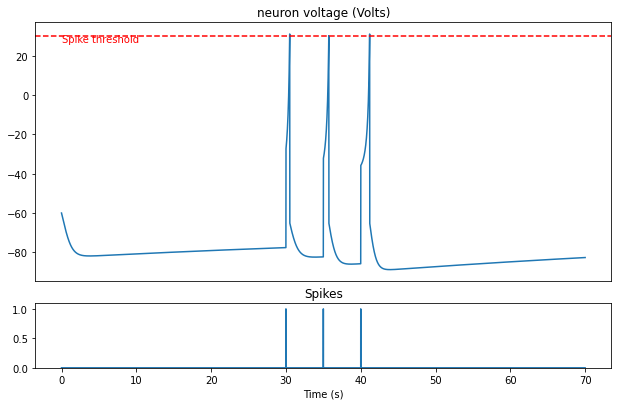

In [24]:
# Use Euler method for solving a izhikevich neuron model
# izhikevich model differential equation:
#   dv/dt = 0.04v^2 + 5v + 140 - u + I
#   du/dt = a(bv - u)
#   if v >= 30mV, then v = c and u = u + d
#   where v is the membrane potential, u is the recovery variable, and I is the input current
#   a, b, c, and d are constants that determine the behavior of the neuron
#   usually, we take a = 0.02, b = 0.2, c = -65, and d = 8 (A regular spiking neuron type)

t = Decimal("0") # Starting time
dt = Decimal("0.005") # Time step
tEnd = Decimal("70") # End time

# LIF parameters
V_th = 30 # Volts
V_init = -60 # neuron starting voltage (at t = 0)
Vt = -60 # Neuron voltage at time step t
Ut = 0 # Neuron recovery variable at time step t
tau = 2. # Time constant
V_excitation = 50 # Voltage added to the neuron at each time step
tExcitation = [Decimal("30"),Decimal("35"),Decimal("40")]

# Model parameters
a = .02
b = .2
c = -65
d = 8

lstV = [] # List to store voltage values
lstTime = [] # List to store time values
lstSpike = [] # List to store spike values at each time step

for i in range(int(tEnd/dt)):
    # Use Euler method
    
    # If voltage is greater than threshold, reset voltage
    if V_th <= Vt:
        
        # Reset voltage and recovery variable
        Vt = c
        Ut = Ut + d
    
    Vt = Vt + float(dt) * (.04*Vt**2 + 5. * Vt +140. - Ut)
    Ut = Ut + float(dt) * a * (b * Vt - Ut)
    
    # If excited, add extra voltage
    if t in tExcitation:
        lstSpike.append(1)
        Vt += V_excitation
    else:
        lstSpike.append(0)
    
    lstV.append(Vt)
    lstTime.append(t)
    t += dt
    
# Create figure and subplots
fig = plt.figure(figsize=(10, 6))

# Top subplot (80% of the height)
ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.6])  # [left, bottom, width, height]
ax1.plot(lstTime, lstV)
ax1.set_title('neuron voltage (Volts)')
ax1.xaxis.set_visible(False)  # Hide x-axis numbers
ax1.axhline(y=V_th, color='r', linestyle='--')
ax1.text(lstTime[0], V_th * .9, 'Spike threshold', color='r')

# Bottom subplot (20% of the height)
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.15])  # [left, bottom, width, height]
ax2.plot(lstTime, lstSpike)
ax2.set_ylim(0, 1.1)
ax2.set_title('Spikes')
ax2.set_xlabel('Time (s)')

plt.show()